In [11]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pykrige.ok import OrdinaryKriging
from pykrige.kriging_tools import write_asc_grid
import pykrige.kriging_tools as kt
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Path, PathPatch

In [125]:
df = pd.read_csv("analysis/precp.csv")
d = '2010-06'
df = df[["lat","long","name",d]]
df = df.dropna(axis = 0, how="any")
lons = np.array(df.long)
lats = np.array(df.lat)
data = np.array(df[d])

In [126]:
grid_space = 0.1
grid_lon = np.arange(lons.min()-0.05, lons.max()+0.1, grid_space) 
grid_lat = np.arange(lats.min()-0.05, lats.max()+0.1, grid_space)
OK = OrdinaryKriging(lons, lats, data, variogram_model='gaussian', verbose=True, enable_plotting=False,nlags=20)
z1, ss1 = OK.execute('grid', grid_lon, grid_lat)
xintrp, yintrp = np.meshgrid(grid_lon, grid_lat)


Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'gaussian' Variogram Model
Partial Sill: 23134.2786697
Full Sill: 32828.1501406
Range: 2.26053377896
Nugget: 9693.87147092 

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



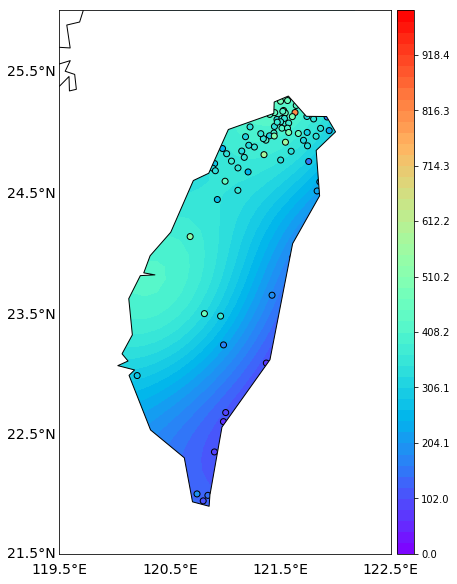

In [128]:
fig, ax = plt.subplots(figsize=(10,10))
m = Basemap(llcrnrlon=119.5,llcrnrlat=21.5,
            urcrnrlon=122.5,urcrnrlat=26, projection='merc', 
            resolution='l',area_thresh=1000.,ax=ax)
m.drawcoastlines() #draw coastlines on the map
x,y=m(xintrp,yintrp)
lo,la = m(lons,lats)
cs = ax.contourf(x,y,z1,
                   cmap="rainbow",
                   levels = np.linspace(0,1000,50))
#cs = ax.scatter(lo,la,c=data,cmap="rainbow")
ax.scatter(lo,la,c=data,cmap="rainbow",vmin=0,vmax=1000,edgecolor="k")
cbar=m.colorbar(cs,location='right') #plot the colorbar on the map
parallels = np.arange(21.5,26.0,1)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=14, linewidth=0.0) #Draw the latitude labels on the map
meridians = np.arange(119.5,123.5,1)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=14, linewidth=0.0)

x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
map_edges = np.array([[x0,y0],[x1,y0],[x1,y1],[x0,y1]])
polys = [p.boundary for p in m.landpolygons]
polys = [map_edges]+polys[:]
codes = [
[Path.MOVETO]+[Path.LINETO for p in p[1:]]
for p in polys
]

polys_lin = [v for p in polys for v in p]
codes_lin = [c for cs in codes for c in cs]

path = Path(polys_lin, codes_lin)
patch = PathPatch(path,facecolor='white', lw=0)
ax.add_patch(patch)
plt.show()

In [32]:
df1 = pd.read_csv("analysis/temperature.csv")
df2 = pd.read_csv("analysis/precp.csv")

In [33]:
df = df1.merge(df2,left_on='name',right_on="name",how="outer")

In [36]:
df1[['2010-01','name']]

,2010-01,name
0,NaN,466850
1,16.7,466880
2,16.0,466900
3,11.1,466910
4,16.9,466920
5,12.5,466930
6,16.5,466940
7,16.0,466950
8,18.5,466990
9,16.9,467060


In [34]:
df['2010-01_x']

0       NaN
1      16.7
2      16.0
3      11.1
4      16.9
5      12.5
6      16.5
7      16.0
8      18.5
9      16.9
10     16.6
11     13.3
12     18.8
13     17.5
14     18.3
15     17.7
16     19.9
17     17.2
18     17.1
19      6.8
20     20.8
21     -0.2
22     15.9
23     21.3
24     19.5
25     18.9
26     14.4
27     19.9
28     16.2
29      NaN
       ... 
71     13.3
72     14.9
73     14.3
74     14.8
75      8.2
76     15.5
77     15.6
78     15.4
79     14.3
80     13.4
81     15.7
82     21.1
83     20.3
84     20.2
85     16.2
86     16.0
87     19.0
88      6.0
89     17.8
90     16.7
91      NaN
92      6.8
93     17.3
94      NaN
95      NaN
96      NaN
97      NaN
98      NaN
99      NaN
100     NaN
Name: 2010-01_x, Length: 101, dtype: float64